In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install tensorflow
!pip install nltk


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import nltk
import re
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [ ]:
file_path = '/content/drive/My Drive/medium_data.csv'  # Update with the correct path if necessary
data = pd.read_csv(file_path)

In [ ]:
import nltk
nltk.data.path = ['/usr/local/share/nltk_data']
nltk.download('punkt')
nltk.download('stopwords')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import nltk

# Download 'stopwords' corpus
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords
import pandas as pd

# Specify the path for NLTK data in Google Drive
nltk.data.path.append('/content/drive/MyDrive/nltk_data')

# Ensure the NLTK 'punkt' and 'stopwords' are downloaded to the specified directory
nltk.download('punkt', download_dir='/content/drive/MyDrive/nltk_data')
nltk.download('stopwords', download_dir='/content/drive/MyDrive/nltk_data')

# Load the dataset from Google Drive
file_path = '/content/drive/MyDrive/medium_data.csv'  # Update with the correct path if necessary
data = pd.read_csv(file_path)

# Make sure there are no NaN values in the 'title' column and convert it to string
data['title'] = data['title'].fillna('').astype(str)

# Define stopwords set
stop_words = set(stopwords.words('english'))

# Function to clean text by removing punctuation and stopwords
def clean_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove stopwords
    text = " ".join([word for word in text.split() if word.lower() not in stop_words])

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text)

    return text.strip()

# Apply text cleaning to the 'title' column
data['Cleaned_title'] = data['title'].apply(clean_text)

# Print the first few rows to verify
print(data[['title', 'Cleaned_title']].head())


[nltk_data] Downloading package punkt to
[nltk_data]     /content/drive/MyDrive/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /content/drive/MyDrive/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                               title  \
0  A Beginner’s Guide to Word Embedding with Gens...   
1  Hands-on Graph Neural Networks with PyTorch & ...   
2                       How to Use ggplot2 in Python   
3  Databricks: How to Save Files in CSV on Your L...   
4  A Step-by-Step Implementation of Gradient Desc...   

                                       Cleaned_title  
0  Beginner’s Guide Word Embedding Gensim Word2Ve...  
1  Handson Graph Neural Networks PyTorch PyTorch ...  
2                                 Use ggplot2 Python  
3           Databricks Save Files CSV Local Computer  
4  StepbyStep Implementation Gradient Descent Bac...  


In [ ]:
# Initialize the tokenizer
tokenizer = Tokenizer()

# Fit the tokenizer on the text data
tokenizer.fit_on_texts(data['Cleaned_title'])

# Convert text to sequences of integers
data['tokenized_title'] = tokenizer.texts_to_sequences(data['Cleaned_title'])

# Print sample tokenized titles
data[['Cleaned_title', 'tokenized_title']].head()


,Cleaned_title,tokenized_title
0,Beginner’s Guide Word Embedding Gensim Word2Ve...,"[552, 28, 347, 1359, 2297, 3557, 51]"
1,Handson Graph Neural Networks PyTorch PyTorch ...,"[3558, 619, 37, 55, 252, 252, 1694]"
2,Use ggplot2 Python,"[27, 3559, 12]"
3,Databricks Save Files CSV Local Computer,"[3560, 183, 1360, 2298, 803, 193]"
4,StepbyStep Implementation Gradient Descent Bac...,"[804, 377, 1695, 1122, 1361]"


In [ ]:
sequences = []

for token_list in data['tokenized_title']:
    for i in range(1, len(token_list)):
        sequence = token_list[:i+1]  # Add the next word to the sequence
        sequences.append(sequence)

print(f"Total Sequences: {len(sequences)}")


Total Sequences: 27357


In [ ]:
# Find the maximum sequence length
max_sequence_len = max(len(seq) for seq in sequences)

# Pad sequences to ensure uniform length
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_len, padding='pre')

print(f"Padded Sequences Shape: {padded_sequences.shape}")


Padded Sequences Shape: (27357, 17)


In [ ]:
# Inputs are all but the last word
X = padded_sequences[:, :-1]

# Outputs are the last word
y = padded_sequences[:, -1]

# Display the shape of inputs and outputs
print(f"Shape of X (inputs): {X.shape}")
print(f"Shape of y (outputs): {y.shape}")



Shape of X (inputs): (27357, 16)
Shape of y (outputs): (27357,)


In [ ]:
vocab_size = len(tokenizer.word_index) + 1  # Add 1 for padding
print(f"Vocabulary size: {vocab_size}")



Vocabulary size: 8832


In [ ]:
from tensorflow.keras.utils import to_categorical

# Convert `y` to one-hot encoding
y = to_categorical(y, num_classes=vocab_size)
print(f"Shape of y after one-hot encoding: {y.shape}")


Shape of y after one-hot encoding: (27357, 8832)


In [ ]:
# Keep `y` as integers (no one-hot encoding)
y = padded_sequences[:, -1]  # Target is the last word
print(f"Shape of y: {y.shape}")


Shape of y: (27357,)


In [ ]:
# Define vocab_size based on the tokenizer
vocab_size = len(tokenizer.word_index) + 1  # +1 for padding


In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Calculate vocab_size based on tokenizer
vocab_size = len(tokenizer.word_index) + 1
print(f"Vocabulary size: {vocab_size}")

# Find the maximum sequence length
max_sequence_len = max(len(seq) for seq in data['tokenized_title'])
print(f"Maximum sequence length: {max_sequence_len}")

# Pad sequences to the maximum length
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_len, padding='pre')
print(f"Padded Sequences Shape: {padded_sequences.shape}")

# Define inputs and outputs
X = padded_sequences[:, :-1]  # Inputs: All but the last word
y = padded_sequences[:, -1]   # Outputs: The last word

# Convert `y` to one-hot encoding for categorical_crossentropy
y = to_categorical(y, num_classes=vocab_size)
print(f"Shape of y after one-hot encoding: {y.shape}")


Vocabulary size: 8832
Maximum sequence length: 17
Padded Sequences Shape: (27357, 17)
Shape of y after one-hot encoding: (27357, 8832)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dropout, Dense
from tensorflow.keras.optimizers import Adam

# Model definition
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=100, input_length=X.shape[1]),  # Input length = number of timesteps
    SimpleRNN(128, return_sequences=False),
    Dropout(0.2),
    Dense(vocab_size, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])



In [ ]:
# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=128)


Epoch 1/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 18s 92ms/step - accuracy: 0.0139 - loss: 8.5711 - val_accuracy: 0.0217 - val_loss: 8.2572
Epoch 2/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 20s 92ms/step - accuracy: 0.0313 - loss: 7.7760 - val_accuracy: 0.0281 - val_loss: 8.3965
Epoch 3/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 21s 92ms/step - accuracy: 0.0386 - loss: 7.5354 - val_accuracy: 0.0325 - val_loss: 8.4466
Epoch 4/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 20s 87ms/step - accuracy: 0.0435 - loss: 7.2260 - val_accuracy: 0.0402 - val_loss: 8.5788
Epoch 5/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 20s 86ms/step - accuracy: 0.0561 - loss: 6.9384 - val_accuracy: 0.0435 - val_loss: 8.6983
Epoch 6/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 15s 88ms/step - accuracy: 0.0646 - loss: 6.6161 - val_accuracy: 0.0457 - val_loss: 8.7763
Epoch 7/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 15s 87ms/step - accuracy: 0.0744 - loss: 6.3161 - val_accuracy: 0.0501 - val_loss: 8.9113
Epoch 8/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 22s 95ms/step - accuracy: 0.0893 - loss: 6.0359 - 

In [ ]:
def predict_next_word(seed_text, model, tokenizer, max_sequence_len):
    # Tokenize and pad the input seed text
    tokenized = tokenizer.texts_to_sequences([seed_text])
    padded = pad_sequences(tokenized, maxlen=max_sequence_len, padding='pre')

    # Predict the next word
    predicted = model.predict(padded, verbose=0)
    predicted_word_index = predicted.argmax()  # Index of the highest probability word

    # Map the index back to the word
    for word, index in tokenizer.word_index.items():
        if index == predicted_word_index:
            return word
    return ""

# Example
seed_text = "my life is"
next_word = predict_next_word(seed_text, model, tokenizer, max_sequence_len)
print(f"Predicted next word: {next_word}")


Predicted next word: workfromhome


In [ ]:
# Example
seed_text = "Chatgpt is"
next_word = predict_next_word(seed_text, model, tokenizer, max_sequence_len)
print(f"Predicted next word: {next_word}")

Predicted next word: linear


In [ ]:
# Save the final model
model.save('final_model.keras')


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_api.py:107: UserWarning: You are saving a model that has not yet been built. It might not contain any weights yet. Consider building the model first by calling it on some data.
  return saving_lib.save_model(model, filepath)


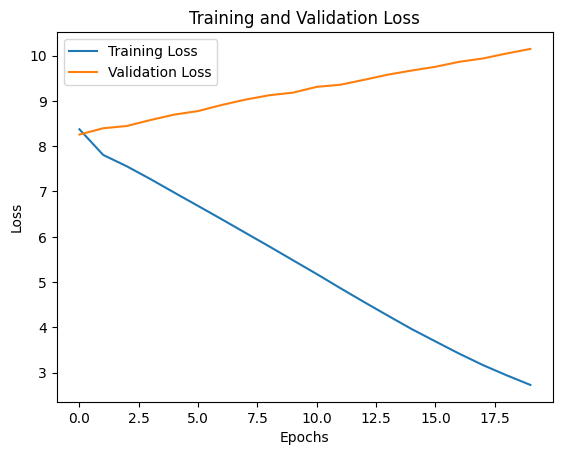

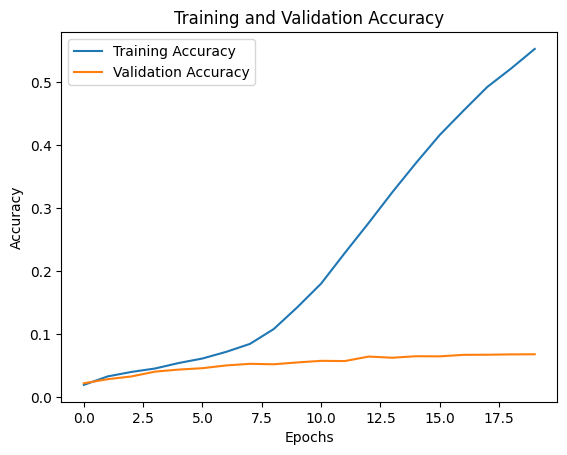

In [ ]:
# Plotting the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
